<center>
    
    Linear Regression
    
    Author: Daniel Coble
</center>

The next few notebooks will provide a step-by-step introduction into machine learning. We'll start with what is a very simple, but highly useful machine learning algorithm: linear regression. Some people don't consider linear regression to be ML since it's use far-predates modern methods. On this issue, we defer to Prof. Downey:

"Anyone who says that linear regression isn't machine learning is categorically wrong."
-- Prof. Austin Downey

We'll start by looking at the simplest one-dimensional example, then show the general math. In the example below, I show some data of the form $\{(x_i,y_i)\}$, where $x_0=0$, $x_1=1
$,... . $y$ seems pretty close to a linear function of $x$. That is, there's almost some $a$ so that
$$ y_i = ax_i $$
But as we can see, really would be no $a$, since there is randomness. The solution is to find the best fit using least squares error. We define a loss function
$$ L(a) = \sum_i (y_i-ax_i)^2 $$
If $y_i = ax_i$ truely did work, then we would have $L(a)=0$. However, with the randomness thrown in, $L(a)$ must be some positive number. The goal of least squares is to minimize $L(a)$. 

<IPython.core.display.Javascript object>


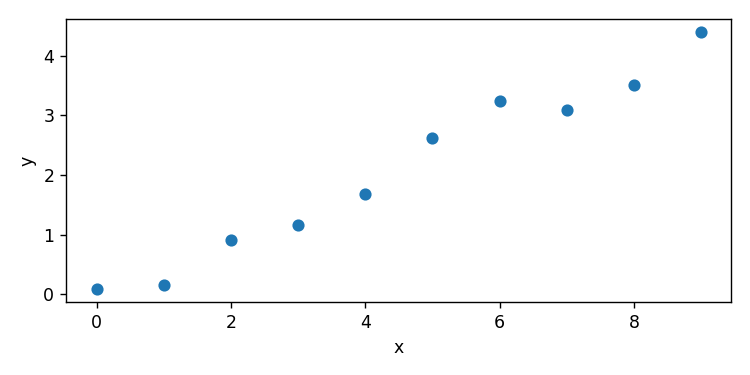

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

y = np.load('./data/y_one_dim.npy')
x = np.arange(10)
plt.figure(figsize=(6,3))
plt.plot(x, y, marker='o', linewidth=0)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

Before revealing the magic formula, experiment with this one-dimensional example by chosing $a$ and trying to minimize $L(a)$:

<IPython.core.display.Javascript object>


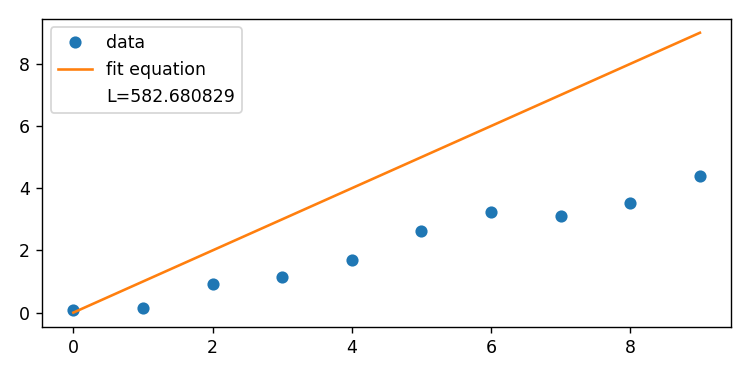

In [2]:
a = 1
L = np.sum(a*x - y)**2

plt.figure(figsize=(6,3))
plt.plot(x, y, marker='o', linewidth=0, label='data')
plt.plot(x, a*x, label='fit equation')
plt.plot([],[], ' ', label='L=%f'%L)
plt.legend()
plt.tight_layout()

The real power of linear regression isn't in one dimensional data, though. It's used when there are multiple features so that the dataset is $\{(y_i, x_i)\}$, where $x_i$ is a vector. The problem is stated formally as follows. Say that we have $N$ samples $(y_i, x_i)$ where $x_i$ is an $m$-vector. We provide the linear model
$$\hat{y}(x_i) = \beta \cdot x_i $$
where $\beta$ is also an $m$-vector. The loss function is $L(\beta)$ is 
$$ L(\hat{y}) = \sum_{i=1}^N (\hat{y}(x_i) - y_i)^2 $$
and the goal is to minimize $L$ across all possible $\hat{y}$. (Equivalently, across all possible $\beta$.) We can place all the vectors $x_i$ into a $N\times m$ matrix $X$ where each row is a sample $x_i$, and all $y_i$ into an $N$-vector $Y$. In a fact that should not be obvious at all, there is actually a closed-form solution to the linear least squares problem which is called the normal equation:
$$ \hat{\beta}=\left(X^TX\right)^{-1}X^TY $$
That's the idea linear regression, but people typically like to add a bias term to the linear model:
$$ \hat{y}(x_i) = \beta \cdot x_i + b $$
The way we deal with this is by adding a dummy feature which is just $1$ to every $x_i$ and add $b$ to $\beta$:
$$ x_i' = \left(1, x_1, x_2,...x_m\right)$$
$$ \beta' = \left(b, \beta_1, \beta_2,...,\beta_m\right)$$
Then we can recover the original equation.
$$\hat{y}(x_i) = \beta' \cdot x_i'$$
In fact, people typically call *this* scheme linear regression, and the fact that it is actually affine regression seems to bother no one except me. Let's do an example with some real data provided by sklearn.

The California housing dataset 20,640 samples, each of which represents a house. Eight features were collected about each house to create $x$, and $y$ is the house's price.

In [3]:
from sklearn import datasets

california_housing = datasets.fetch_california_housing()

X = california_housing['data']
Y = california_housing['target']

N = X.shape[0]
m = X.shape[1]
feature_names = california_housing['feature_names']
descr = california_housing['DESCR']
print(descr)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
# Let's look at one house in the dataset
i = np.random.randint(0, N)
x_i = X[i]
print("One house in the dataset has:")
for j in range(8):
    print(feature_names[j], '=', x_i[j])

# Now do the linear regression.
# Append bias column to X
X = np.append(np.ones((N,1)),X, axis=1)

beta = np.linalg.inv(X.T@X)@X.T@Y
print("beta:")
print(beta)

One house in the dataset has:
MedInc = 2.7083
HouseAge = 21.0
AveRooms = 4.495588235294117
AveBedrms = 1.026470588235294
Population = 1627.0
AveOccup = 2.3926470588235293
Latitude = 35.33
Longitude = -119.03
beta:
[-3.69419202e+01  4.36693293e-01  9.43577803e-03 -1.07322041e-01
  6.45065694e-01 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01
 -4.34513755e-01]


In [5]:
# Now we can do some prediction
i = np.random.randint(0, N)
x_i = X[i]
y_i = Y[i]
print("One house in the dataset has:")
for j in range(8):
    print(feature_names[j], '=', x_i[j])
print('\n')
y_hat_i = beta@x_i
print("The house is worth %f"%y_i)
print("The model predicts that it's worth %f"%y_hat_i)

One house in the dataset has:
MedInc = 1.0
HouseAge = 3.1378
AveRooms = 13.0
AveBedrms = 4.135957066189624
Population = 1.0590339892665475
AveOccup = 2038.0
Latitude = 3.6457960644007157
Longitude = 33.92


The house is worth 1.370000
The model predicts that it's worth 1.728273


**Challenge Problem**

Say we suspect that a dataset $\{(y_i, x_i)\}$, $x_i = (x_{i,1},x_{i,2})$ might be well-fit by the quadratic polynomial:
$$ \hat{y}(x_i) = \beta_1x_{i,1}^2 + \beta_2x_{i,1}x_{i,2} + \beta_3x_{i,2}^2 + \beta_4x_{i,1} + \beta_5x_{i,2} + \beta_6 $$

We can still use linear regression to solve for $\beta$ by using *linear regression over higher order features*. The idea is basically the same as when we added a column of $1$'s to $X$ to represent a bias, but now we will add columns which are functions of $x_{{i,1}}$ and $x_{{i,2}}$. I've created a dataset with $N=200$ samples and below I load it. create a matrix $X$ that has all six features, then do linear regression. I've also added code to make a 3D plot of the dataset and the model that you will create. Create a function from your model which accepts `x_1` and `x_2` arguments and provide it as an argument to `make_3D_plot`.

<IPython.core.display.Javascript object>


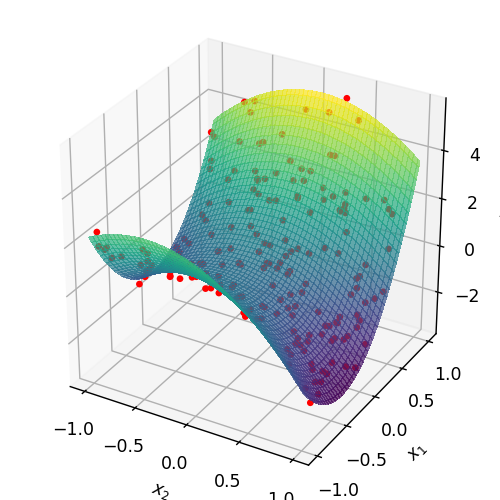

In [6]:
X_simple = np.load("./data/X_simple.npy")
y = np.load("./data/y.npy")

x_1squared = (X_simple[:,0]**2).reshape(-1, 1)
x_1x_2 = (X_simple[:,0]*X_simple[:,1]).reshape(-1, 1)
x_2squared = (X_simple[:,1]**2).reshape(-1, 1)
ones = np.ones((X_simple.shape[0],1))

# assemble X matrix
X = np.append(x_1squared, x_1x_2, axis=1)
X = np.append(X, x_2squared, axis=1)
X = np.append(X, X_simple, axis=1)
X = np.append(X, ones, axis=1)

# linear regression
beta = np.linalg.inv(X.T@X)@X.T@y

def y_hat(x_1, x_2):
    return beta[0]*x_1**2 + beta[1]*x_1*x_2 + beta[2]*x_2**2 + beta[3]*x_1 + beta[4]*x_2 + beta[5]

'''
if y_hat = None, then only the datapoints are plotted. If y_hat is included, a surface of y_hat is plotted.
'''
def make_3D_plot(y_hat=y_hat):
    from matplotlib import markers
    X_simple = np.load("./data/X_simple.npy")
    y = np.load("./data/y.npy")
    x_1 = X_simple[:,0]
    x_2 = X_simple[:,1]
    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))
    style = markers.MarkerStyle(marker='o', fillstyle='full')
    ax.scatter(x_2, x_1, y, marker=style, s=15, alpha=1, linewidths=0, c='red')
    ax.set_box_aspect([1, 1, 1])
    if(not y_hat is None):
        x_1_axis = np.linspace(-1, 1, 100)
        x_2_axis = np.linspace(-1, 1, 100)
        
        x_1_mesh, x_2_mesh = np.meshgrid(x_1_axis, x_2_axis)
        y_hat_mesh = np.zeros((100, 100))
        for i in range(100):
            for j in range(100):
                y_hat_mesh[i,j] = y_hat(x_1_mesh[i,j], x_2_mesh[i,j])
        ax.plot_surface(x_2_mesh, x_1_mesh, y_hat_mesh, cmap='viridis', alpha=.70, antialiased=False)
    
    ax.set_xlabel('$x_2$')
    ax.set_ylabel('$x_1$')
    ax.set_zlabel('$y$')
    plt.tight_layout()
    plt.show()
    return y_hat_mesh
y_hat_mesh = make_3D_plot(y_hat=y_hat)